## **Load Data and Pre - processing**

In [17]:
from keras.src.utils import np_utils

In [18]:
import keras
from keras import datasets, layers, models
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Load cifar10 dataset

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape, X_test.shape)

# All classes in cifar10
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# One hot Coding the target class
y_train = np_utils.to_categorical(y_train, len(classes)).astype(int)
y_test = np_utils.to_categorical(y_test, len(classes)).astype(int)
print(y_train[:5])

(50000, 32, 32, 3) (10000, 32, 32, 3)
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


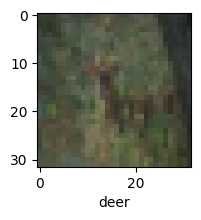

In [33]:
# visualize image function
def plot_sample(X, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  class_index = None
  for id in range(len(y[index])):
    if y[index][id]:
      class_index = id
  plt.xlabel(classes[class_index])

# normalize data
X_train, X_test = X_train/255, X_test/255
plot_sample(X_train, y_train, 10)

## **Build a convolutional neural network to train images**

In [34]:
# creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation='softmax'))

In [35]:
# compiling the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [37]:
# fitting the model
model.fit(X_train, y_train, batch_size = 64, epochs = 15, validation_data = (X_test, y_test))

Epoch 1/15
782/782 [==============================] - 430s 549ms/step - loss: 0.6860 - accuracy: 0.7637 - val_loss: 0.7397 - val_accuracy: 0.7474
Epoch 2/15
782/782 [==============================] - 430s 550ms/step - loss: 0.6552 - accuracy: 0.7743 - val_loss: 0.6484 - val_accuracy: 0.7751
Epoch 3/15
782/782 [==============================] - 415s 531ms/step - loss: 0.6265 - accuracy: 0.7837 - val_loss: 0.5492 - val_accuracy: 0.8071
Epoch 4/15
782/782 [==============================] - 412s 527ms/step - loss: 0.6000 - accuracy: 0.7953 - val_loss: 0.6007 - val_accuracy: 0.7935
Epoch 5/15
782/782 [==============================] - 410s 524ms/step - loss: 0.5767 - accuracy: 0.8027 - val_loss: 0.5915 - val_accuracy: 0.7992
Epoch 6/15
782/782 [==============================] - 411s 526ms/step - loss: 0.5574 - accuracy: 0.8072 - val_loss: 0.5615 - val_accuracy: 0.8103
Epoch 7/15
782/782 [==============================] - 409s 524ms/step - loss: 0.5500 - accuracy: 0.8113 - val_loss: 0.5147 -

In [38]:
# evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 22s 69ms/step - loss: 0.5013 - accuracy: 0.8311


[0.5013024806976318, 0.8310999870300293]

313/313 [==============================] - 22s 72ms/step


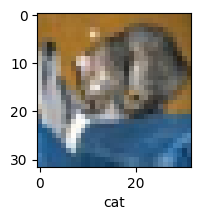

In [40]:
# prediction
y_pred = model.predict(X_test)
plot_sample(X_test, y_test, 0)

In [42]:
labels_pred = [np.argmax(element) for element in y_pred]
classes[labels_pred[0]]

'cat'